In [1]:
#Import the packages 
    #[import] packName [as] aliasName
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
    
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 
    
#Read the data in
    #df is the variable name we're using, it stand for data frame ... the data
    #... we're going to use is refered to as the data frame
    # an 'r' must be put outside of the reference to the csv to avoid error
df = pd.read_csv(r'C:\Users\Lord\Desktop\Data Analyst Portfolio Projects\movies.csv')

In [2]:
#this allows us to take a look at the data, it's a good practice to get an 
#... overview
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
#We can check the datatypes
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [4]:
# Check if there's any missing data 
# It's going a for loop that check each colum for nulls and gives a % that's missing

# for each colum in the dataframe colums ( budget, company ...)
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    #the '{}' are place holders for the format method
    #'col' is in the first, and 'pct_missing' in the second
    print('{} - {}%'.format(col,percent_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
# Changing data types of columns
# There are 3 columns that are of type float64, and the include decimals
# Budget, Gross, Score ... Score should keep it's decimal point, but ...
# Budget & Gross need to get rid of it. An int = whole number.

#change type with 'astype' and equate it to itself to override
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

#check change
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
#the year in 'released' column and 'year' column don't always match: problem
# I don't know which is correct, so I'm going to make a new column
# A new column in created in the familar format below
# I'm going to make the new column a string version of the old release column
# ... which was an 'object' type
# ... I'm doing this so that I can use the 'str' function and take the first 
# ... four characters (0-4)
df['correctYear'] = df['released'].astype(str).str[0:4]

#check
df.head()

#It works, if we need to use the date, we'll use that one

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [7]:
# I want to order the data frame by the gross
# sort_values takes 3 parameters: ...
    #whatToOrderBy  (by) = gross
    #doYouWantToDoItInPlace (inplace) = No,False
    #ascending (ascending) = False
df = df.sort_values(by='gross',inplace=False,ascending=False)



In [8]:

#check
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [9]:
#dropping any duplicates in the table
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


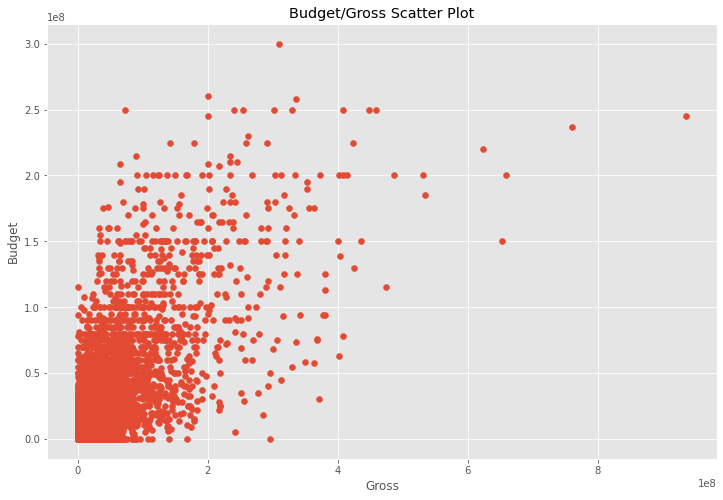

In [10]:
# ************* CORRELATION FINDING ***********************
# We're trying to find a correlation as part of the analysis
# There may be numerous correlations between the columns 
# But, we'll focus on the obvious: Budget vs Gross

#We'll use matplotlib (which we've aliased as plt) to help us make a scatter
# ... plot

plt.scatter(x=df['gross'],y=df['budget'])
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.title('Budget/Gross Scatter Plot')
plt.show()

In [11]:
#We'll fact check this by seeing if the first entry in the list correspnds...
# with it's plot point
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='gross', ylabel='budget'>

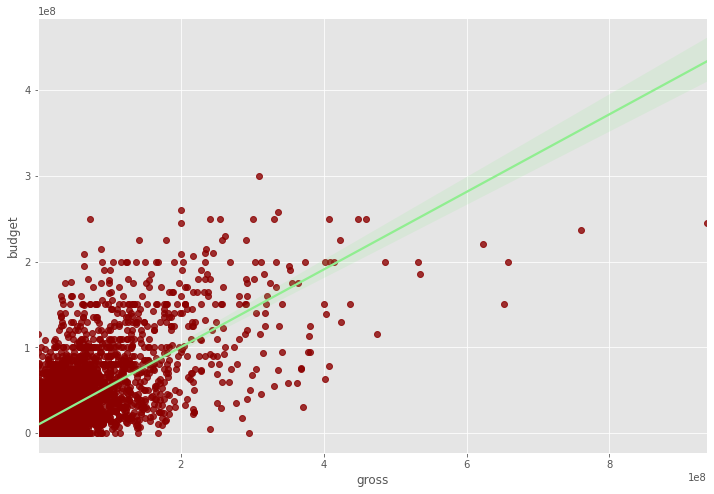

In [12]:
# We'll try another plot - this time with a line using seaborn
# When we imported seaborn we equated it to the variable 'sns'
# Syntax: sns.regplot(X=ColumnX , Y=ColumnY, Data=DataFrame, ...........
# ....... scatter_kws=scatter color, line_kws=line color

sns.regplot(x='gross',y='budget',data=df,scatter_kws={"color":"darkred"},line_kws={"color":"lightgreen"})


In [13]:
# We can filter our data with the query function
# If we only want the action  genre 
actionOnlyRows = df.query("genre == 'Action'")


#this returns rows , in which the genre is action. Let's check.
actionOnlyRows.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008,2008


<AxesSubplot:xlabel='genre', ylabel='gross'>

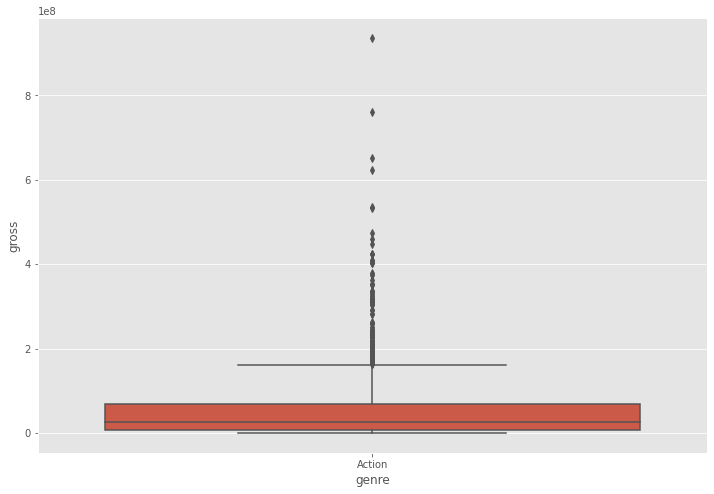

In [14]:
# We can use a box plot to compare the percentile gross of any genre
sns.boxplot(x=actionOnlyRows['genre'],y=actionOnlyRows['gross'])


<AxesSubplot:xlabel='genre', ylabel='gross'>

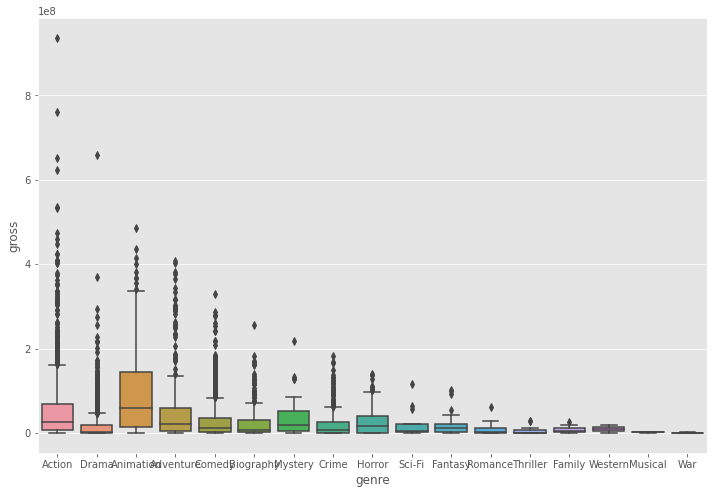

In [15]:
# Or we can do a boxplot  for the entire data frame
sns.boxplot(x=df['genre'],y=df['gross'])

# As we can see, the inter quartile range for Animated movies ...
#  is greater than any other type: 






<AxesSubplot:xlabel='correctYear', ylabel='gross'>

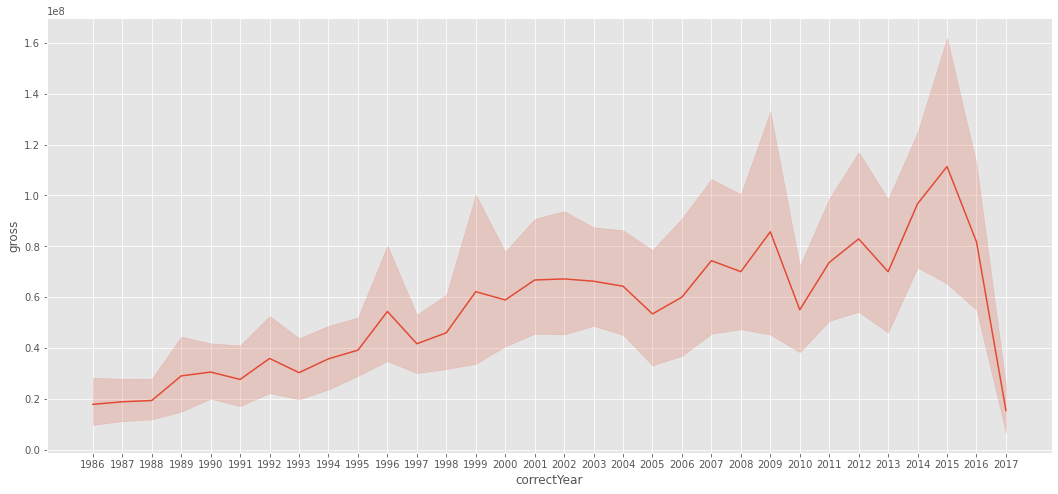

In [16]:
# if we want a line plot, with x as the year - we first need to sort by year
actionOnlyRows = actionOnlyRows.sort_values(by='correctYear',inplace=False,ascending=True)

# In hindsight, if the x ( or y) labels are jumbled, adjust the figure size...
# ... before plotting
plt.figure(figsize=(18,8))


# Then we can plot our lineplot to see if year progression affects gross in ...
# ... action movies
sns.lineplot(data=actionOnlyRows, x="correctYear", y="gross")

# As we can see, until 2016/2017, the gross for action moves increase generally.

In [17]:
# We've seen the effect of Gross as Year progresses. How does Month relate to Gross in regards to Action movies? Let's see.

#Once again create a new column, from the 'released' column, that extracts the month. Example date: 2015-12-18
df['month'] = df['released'].astype(str).str[5:7]

#Check it's been done correctly
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear,month
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015,12
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009,12
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997,12
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015,06
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012,05


<AxesSubplot:xlabel='month', ylabel='gross'>

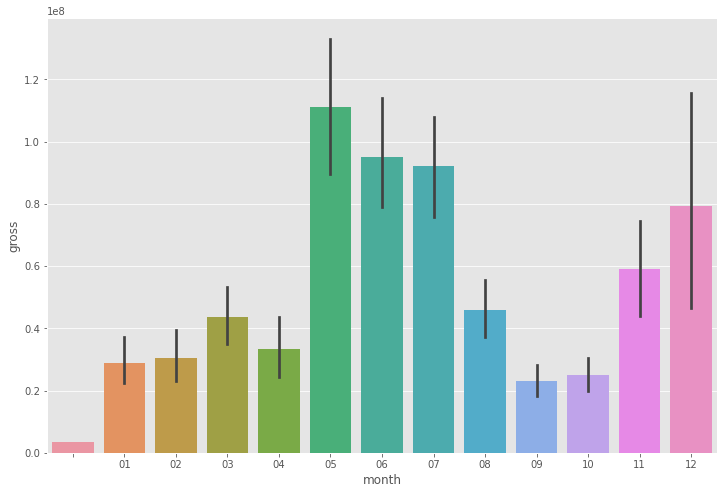

In [18]:
# Firstly, above we changed the orignal data frame schema by adding 'month', so we need to update the actionOnlyRows...
# ... with the new dataframe, then filter it for the action genre again
actionOnlyRows = df.query("genre == 'Action'")

#Once again, this is by month the the data needs to be ordered by month for clarity
actionOnlyRows = actionOnlyRows.sort_values(by='month',inplace=False,ascending=True)

#the bar plot 
sns.barplot(x="month",y="gross",data=actionOnlyRows)

#So, we can see that the most 'profitable' (highest gross != profit) months are; May, June, July.

In [19]:
# I want to know if the country has an affect of gross by month
UKvsUSAGrossByMonth = df[['country','gross','month']]
UKvsUSAGrossByMonth.head()


,country,gross,month
6380,USA,936662225,12
5061,UK,760507625,12
2420,USA,658672302,12
6391,USA,652270625,06
5723,USA,623357910,05


In [20]:
#Before, we used //actionOnlyRows = df.query("genre == 'Action'") ... to filter actionactionOnlyRows to get Action only 
#We now need to filter for TWO things in a column (country)

#create a list with the values you want 
UKandUSA = ['USA','UK']

#we can use an 'isin' statement, and pass our list in to create a new variable
# Syntax: x = dataFrame[dataFrame.filterColumn.isin(listOfValuesSoughtFor)]
UKvsUSAGrossByMonth=UKvsUSAGrossByMonth[UKvsUSAGrossByMonth.country.isin(UKandUSA)]# So let's use the barplot to do it

#Let's test we only get UK and USA
UKvsUSAGrossByMonth.head()

,country,gross,month
6380,USA,936662225,12
5061,UK,760507625,12
2420,USA,658672302,12
6391,USA,652270625,06
5723,USA,623357910,05


In [21]:
#Let's sort the values by month ascending for the barplot
UKvsUSAGrossByMonth = UKvsUSAGrossByMonth.sort_values(by='month',ascending=True)

<AxesSubplot:xlabel='month', ylabel='gross'>

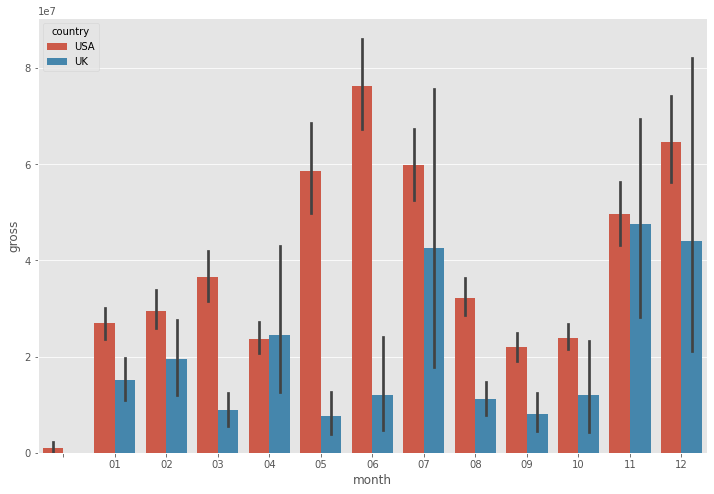

In [22]:
#Let's now make the barplot for this, using the hue as the country.
sns.barplot(x='month',y='gross',hue='country',data=UKvsUSAGrossByMonth)

In [23]:
# We can use this basic correlation method - however, it only works on ...
# ... numeric fields. 

# default correlation method = df.corr()

# There are different types of correlation methods: #pearson #kendall #spearman
# The default for the basic correlation method is pearson
# We can, however, specify. 

df.corr(method='pearson')

#As we can see budget and gross have the highest correlation regardless of  ..
# ... method... BUT , different methods come to different values

#The output is reffered to as a correlation matrix

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


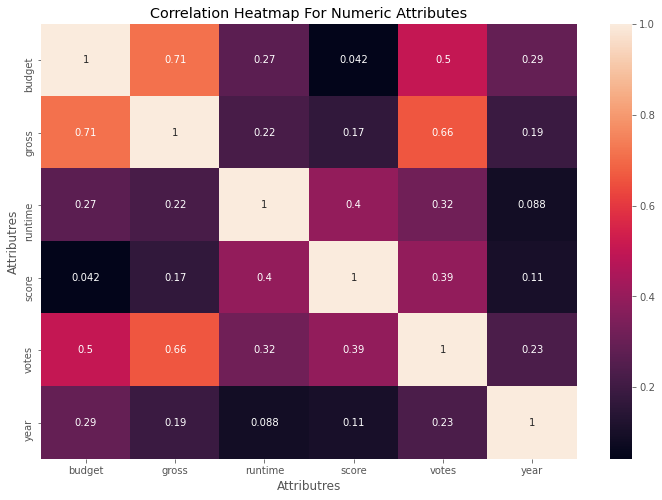

In [24]:
#Let's have some fun, let's do a heatmap
# Seaborn (aliased as sns for me) allows us to do a heatmap
# Above I said the output is a correlation matrix, let's use a variable to ...
# Store it 

corr_matrix = df.corr(method='pearson')

#then we can use the seaborn heatmap function, and pass the paramters

sns.heatmap(corr_matrix,annot=True)

#Then we can add the labels and use plt.show to show
plt.title('Correlation Heatmap For Numeric Attributes')
plt.xlabel('Attributres')
plt.ylabel('Attributres')
plt.show()

#As we can see, the lighter the color = more correlation

In [30]:
# This part is slightly more complex in code, but in understanding it's ez

# The above only works for numeric attributes
# We want to see the correlation for ALL attributes (inc strings)
# We need to convert it into a numeric somehow
# We'll do this by convert the data type of attributes that aren't numeric ...
# To the 'category' data type, then from category to 'cat codes'
# Which will thus give each string attribute a numeric equivalent
# We'll use a for loop to this this per column

#1.) create a variable to hold the data frame so we can operate on it
data_to_catcodes = df

#2.) create a for loop to iterate through each column
for col in data_to_catcodes.columns:
    if data_to_catcodes[col].dtypes not in ('int64','float64'):
        data_to_catcodes[col] = data_to_catcodes[col].astype('category')
        data_to_catcodes[col] = data_to_catcodes[col].cat.codes
        
data_to_catcodes.head()
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctYear,month
6380,245000000,346,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29,12
5061,237000000,345,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23,12
2420,200000000,337,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11,12
6391,150000000,324,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29,6
5723,220000000,342,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26,5


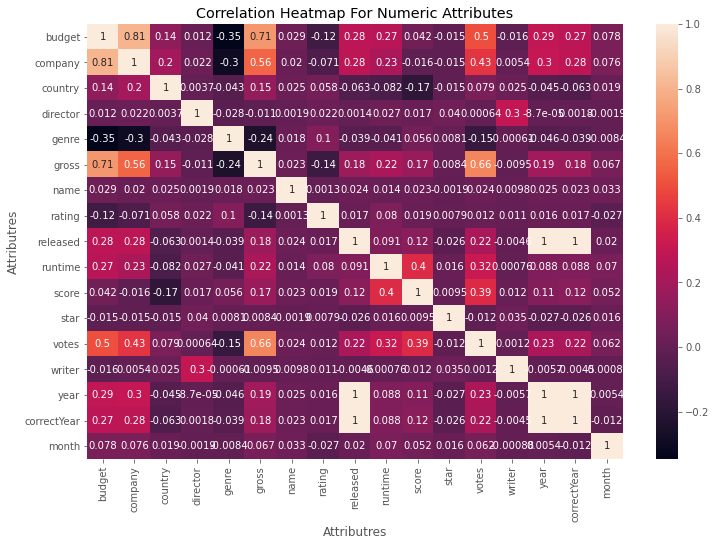

In [32]:
# It's worked, each column, that wasn't already an int or float has been ...
# converted to a cat code

# now we can do out heat map again
corr_matrix = data_to_catcodes.corr(method='pearson')

#then we can use the seaborn heatmap function, and pass the paramters

sns.heatmap(corr_matrix,annot=True)

#Then we can add the labels and use plt.show to show
plt.title('Correlation Heatmap For Numeric Attributes')
plt.xlabel('Attributres')
plt.ylabel('Attributres')
plt.show()

#It Works!

In [33]:
# This visualisation is good, but to make it better, I want to remove ...
# ... the pairs with a weak correlation

#remember, we still have our matrix that we used for the heatmap
corr_matrix

#A different way to see the pairs better is to unstack them
unstacked_matrix_pairs = corr_matrix.unstack()

#let's see how it looks
unstacked_matrix_pairs

budget  budget         1.000000
        company        0.808817
        country        0.137635
        director       0.011602
        genre         -0.346794
                         ...   
month   votes          0.061551
        writer        -0.000878
        year           0.005377
        correctYear   -0.012479
        month          1.000000
Length: 289, dtype: float64

In [34]:
# well, we want to filter out a certain amount of correlation values
# ... this is because a really low correlation means nothing to us
# ... because we want to make attributes with high correlations stand out 

#Firstly, let's just sort our unstack correlation matrix for clarity
sorted_matrix_pairs = unstacked_matrix_pairs.sort_values()
sorted_matrix_pairs

genre        budget        -0.346794
budget       genre         -0.346794
company      genre         -0.299383
genre        company       -0.299383
gross        genre         -0.242676
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
correctYear  correctYear    1.000000
month        month          1.000000
Length: 289, dtype: float64

In [35]:
# Now filter for high correlations
# syntax: variable = sorted_pairs(where each pair is > greater than 0.5)
high_correlations = sorted_matrix_pairs[(sorted_matrix_pairs)> 0.5]



#Let's see what it looks like
high_correlations

budget       votes          0.503924
votes        budget         0.503924
company      gross          0.562381
gross        company        0.562381
             votes          0.662457
votes        gross          0.662457
budget       gross          0.712196
gross        budget         0.712196
company      budget         0.808817
budget       company        0.808817
released     year           0.996187
year         released       0.996187
             correctYear    0.996229
correctYear  year           0.996229
             released       0.999389
released     correctYear    0.999389
budget       budget         1.000000
released     released       1.000000
year         year           1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
g

In [36]:
# There we go.

# The purpose of this project was to find correlations between attributes.
# The final output shows the highest correlated attrbiutes 
# So what are our findings?

# ---> Votes & Budget have the highest correlation with Gross
# ---> Company & Director were not as correlated with other attributes as first thought
# ---> Genre is the least correlated attribute